# Import libraries.

OONMFhelpers isn't really necessary but contains a few useful routines i wrote. 


In [1]:
import numpy as np
import pandas as pd
import sys 
import matplotlib.pyplot as plt


import OONMFhelpers
today  = OONMFhelpers.get_today()

In [2]:
today

'2018-11-09'

# Load data and examine it

In [3]:
# original 733 sample  NMF component matrix
Basis_orig = np.load('2018-06-08NC16_NNDSVD_Basis.npy')

In [42]:
# newly generated 756 sample NMF component matrix
Basis_new = np.load('2018-11-09PancSpecialNC16seed20.npy')

### verify the shapes

In [6]:
Basis_new.shape

(756, 16)

In [7]:
Basis_orig.shape

(733, 16)

### make a cut that only contains the new samples

In [8]:
Basis_panky = Basis_new[733:]

In [9]:
Basis_panky.shape

(23, 16)

### load up our color scheme

In [10]:
Comp_colors = ['#FFE500', '#FE8102', '#FF0000', '#07AF00', '#4C7D14', '#414613', '#05C1D9', '#0467FD', '#009588', '#BB2DD4', '#7A00FF', '#4A6876', '#08245B', '#B9461D', '#692108', '#C3C3C3']
neworder = np.array([16,10,7,11,2,12,1,8,4,15,14,5,9,6,3,13]).astype(int) - 1
Comp_colors = np.array(Comp_colors)[neworder]

### somewhat convoluted function to make our "signature" bar graphs  

In [22]:
def make_stacked_bar_plot(Ncomps, Nrelevant, BarMatrix, bargraph_out, names = [], plotClusterMode=False, barsortorder=[], clusterTopLabels=[],  plot_title=''):
    if len(barsortorder)<1:
        barsortorder = np.arange(Nrelevant)
        #print('inventing barsortorder')
    if len(names) < 1:
        #print('inventing names')
        names = [str(i) for i in range(Nrelevant)]
        names = np.array(names)
    ttt = np.arange(Nrelevant)
    start = 0
    end = Nrelevant
    ground_pSample = ttt*0
    plt.clf()
    plt.figure(figsize=(150,40))
    plt.bar(ttt[start:end], BarMatrix[0,start:end][barsortorder],  color=Comp_colors[0], bottom=ground_pSample[start:end], alpha=1.0)
    ground_pSample = BarMatrix[0,start:end][barsortorder]
    for i in range(1,Ncomps):
        plt.bar(ttt[start:end],BarMatrix[i,start:end][barsortorder], bottom = ground_pSample, color=Comp_colors[i], alpha=1.0)
        ground_pSample = np.sum(BarMatrix[0: i+1,start:end], axis=0)[barsortorder]
    OONMFhelpers.increase_axis_fontsize()
    plt.ylabel('sum of signal in matrix',fontsize=70)
    if (len(plot_title) > 0):
        plt.title(plot_title,fontsize=70)
    #plt.title('Full Sample',fontsize=70)
    samplenamesize = 11
    samplenamesize = (1/Nrelevant)**0.5 * 300
    #thebottom = 0.15
    thebottom = min([(1/Nrelevant)**0.3 * 1.2, 0.3])
    if(plotClusterMode):
        plt.xticks(ttt, ttt.astype(str), rotation='vertical', fontsize=samplenamesize)
        if len(clusterTopLabels) > 0:
            ax = plt.gca()
            ax2 = ax.twiny()
            ax2.set_xticks(ttt)
            ax2.set_xticklabels(clusterTopLabels.astype(str), rotation=90, fontsize=samplenamesize)
            #ax.xaxis.tick_top()
            #plt.xticks(ttt, clusterTopLabels.astype(str), rotation='vertical', fontsize=samplenamesize)
    else:
        plt.xticks(ttt, names[barsortorder], rotation='vertical', fontsize=samplenamesize)	
    plot_margin = 5
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=thebottom)
    #plt.savefig(bargraph_out)
    plt.show()

### read sample names file for original 733 sample masterlist

In [43]:
sampnamePD = pd.read_table('sampnams_733.txt', header=None, names=['LN', 'DS', 'type'])
sampnamePD['full_name'] = sampnamePD.LN + '-' + sampnamePD.DS + '-' + sampnamePD.type
fullnames = sampnamePD.full_name.values

### make a quick roundup of the Pancreas and PANC1 (pancreatic cancer) samples from old data

In [13]:
pancnames_cut = []
for name in fullnames:
    if 'PANC' in name:
        pancnames_cut.append(True)
    elif 'Pancreas' in name:
        pancnames_cut.append(True)
    else:
        pancnames_cut.append(False)


In [14]:
pancnames_cut = np.array(pancnames_cut)
len(pancnames_cut[pancnames_cut])

3

### get file names (LN numbers)  for new samples

In [15]:
finname = 'alex_LN_names.txt'
f = open(finname, 'r')
dars = f.readlines()
pank_LN_ar = []
for line in dars:
    pank_LN_ar.append(line.strip())
f.close()

In [44]:
#combined list of names
allnames = fullnames.tolist() + pank_LN_ar

In [45]:
len(allnames)

756

### make the bar plot for all 756 samples. 
### note that this version is unnormalized and ordered according to the line number of each sample name in the sampnames.txt files. New samples are all at the end. 

<Figure size 432x288 with 0 Axes>

<Figure size 10800x2880 with 0 Axes>

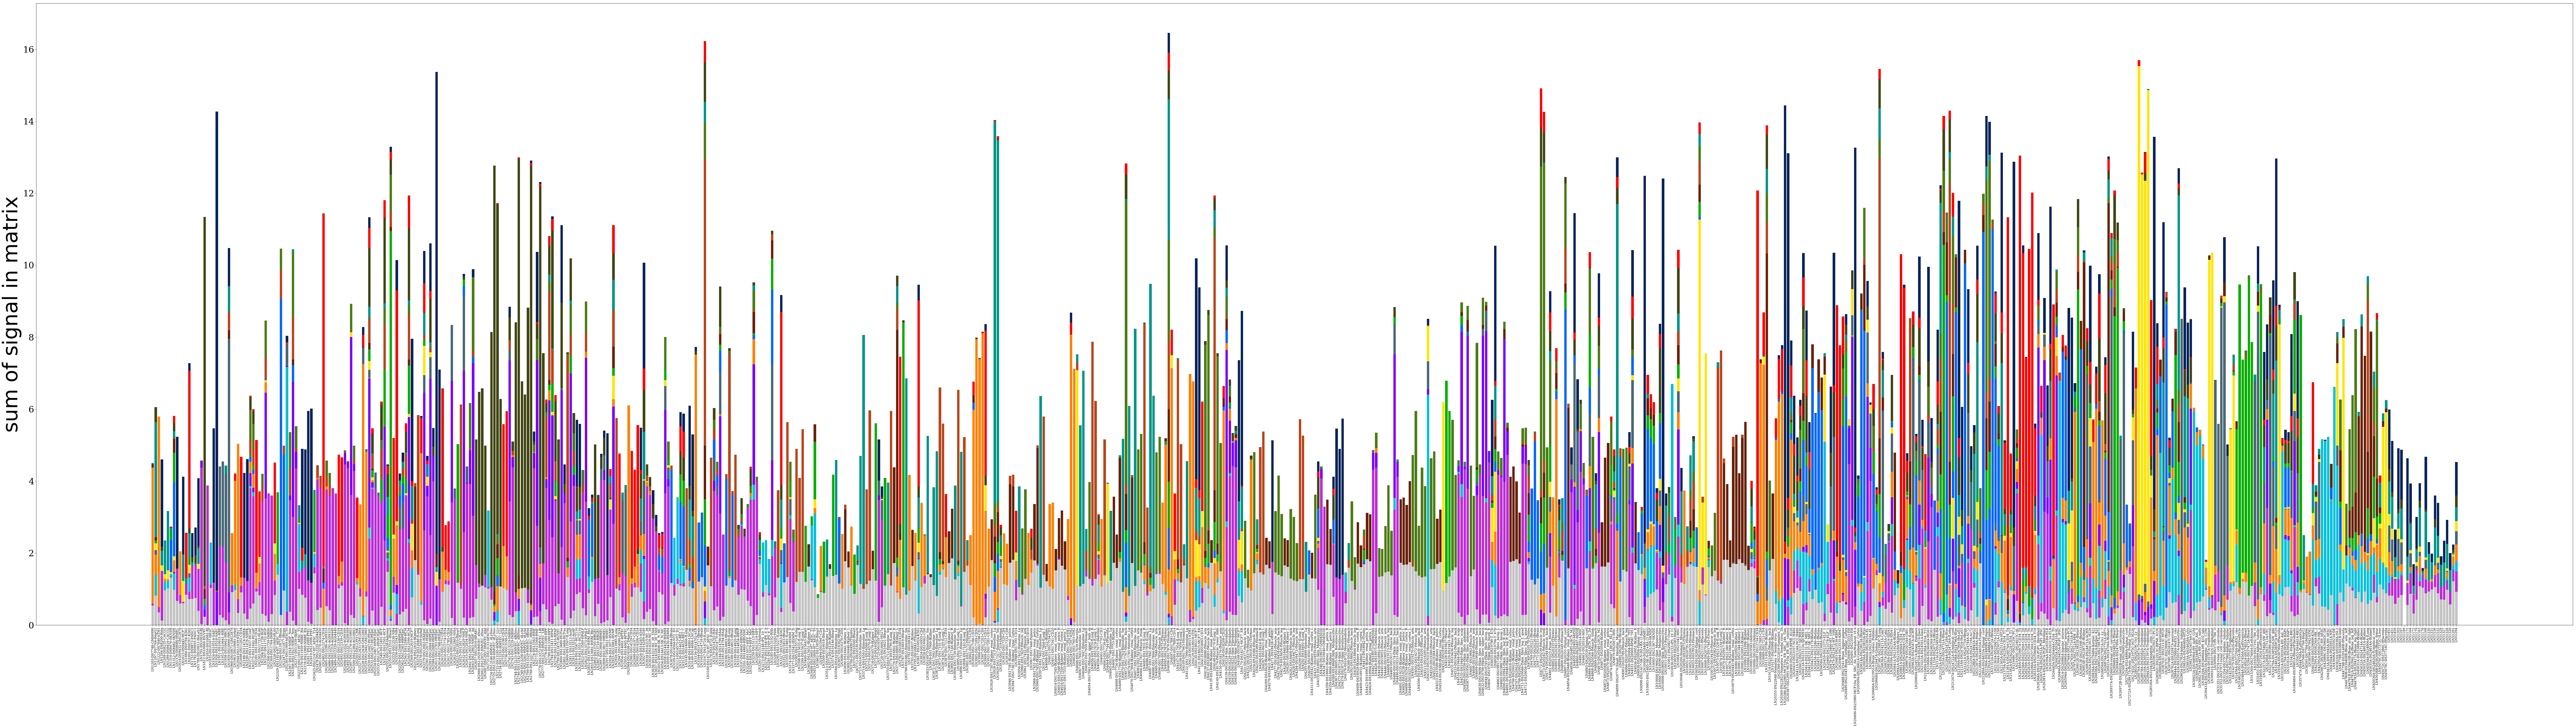

In [23]:
make_stacked_bar_plot(16, 756, Basis_new.T, '', names=np.array(allnames))

### if you want the bars sorted by component, you can use the get_barsortorder function

In [24]:
barsortorder = OONMFhelpers.get_barsortorder(Basis_new)

<Figure size 432x288 with 0 Axes>

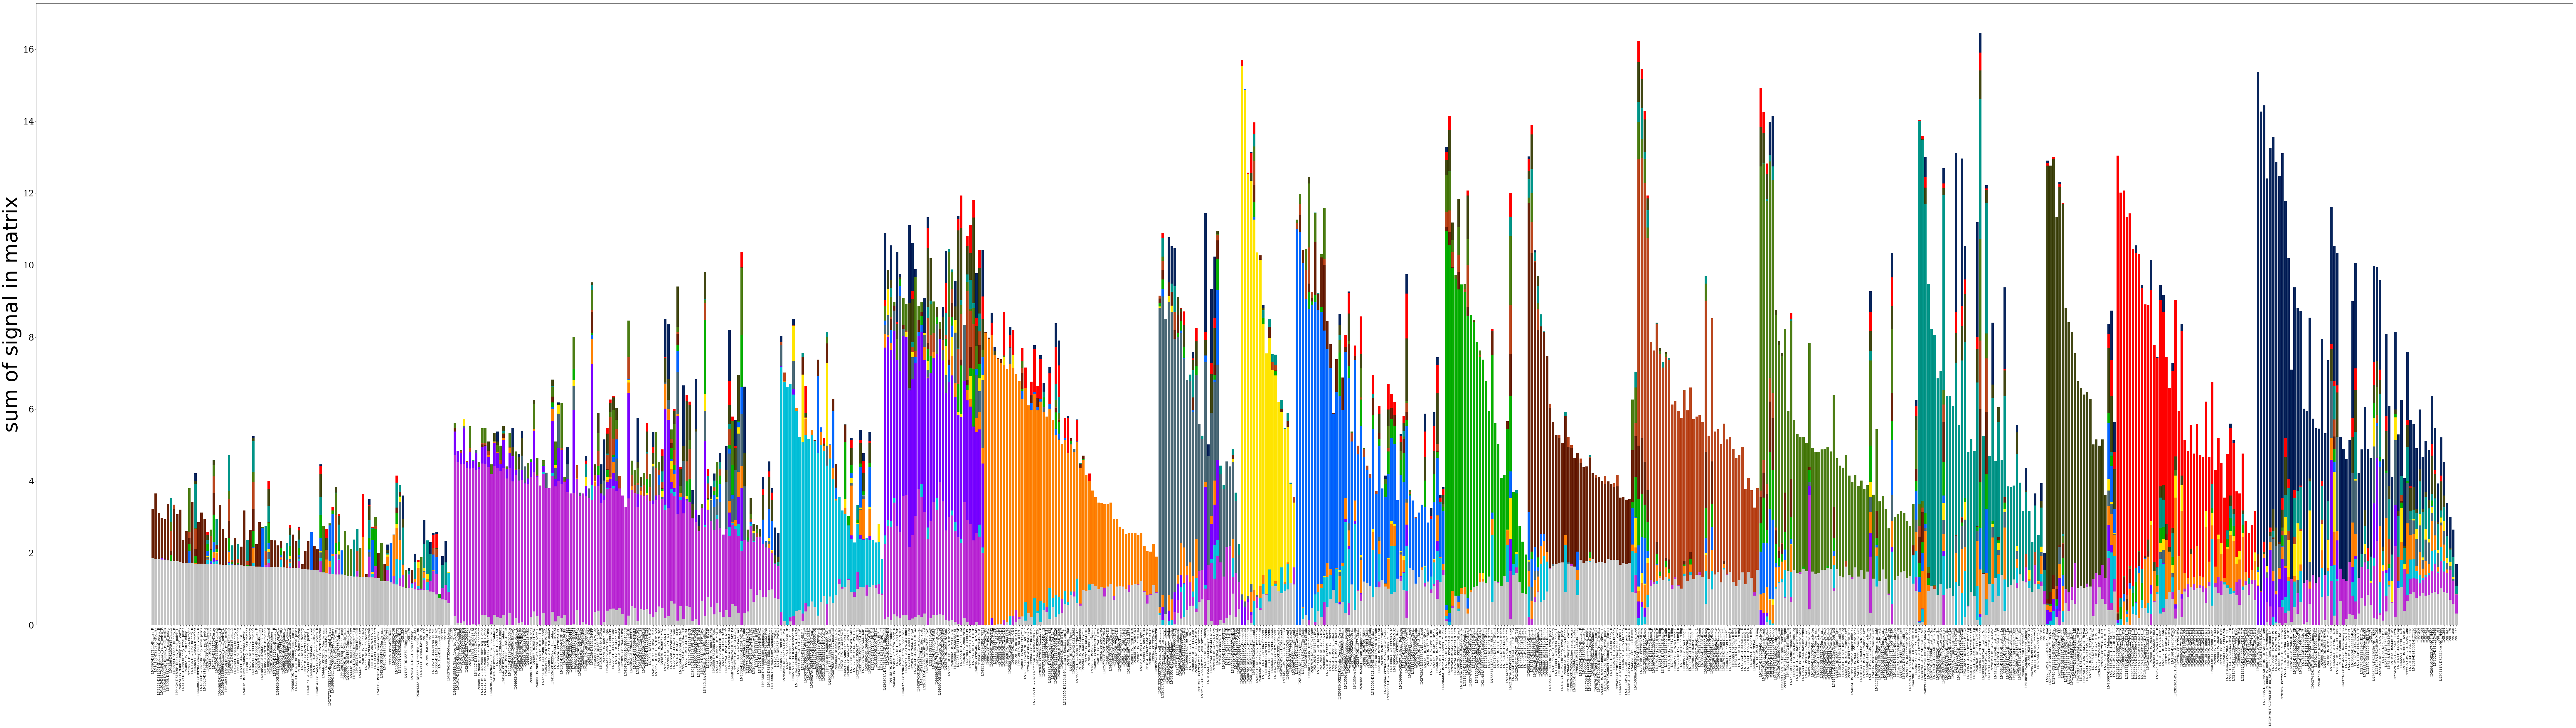

In [25]:
make_stacked_bar_plot(16, 756, Basis_new.T, '', names=np.array(allnames), barsortorder=barsortorder)

### make a version that only shows the bars for old and new pancreas samples

In [26]:
old_new_panc = np.concatenate([Basis_orig[pancnames_cut],Basis_panky ])
old_new_panc_names = np.array(fullnames[pancnames_cut]).tolist() + pank_LN_ar

In [46]:
len(old_new_panc_names)

26

<Figure size 432x288 with 0 Axes>

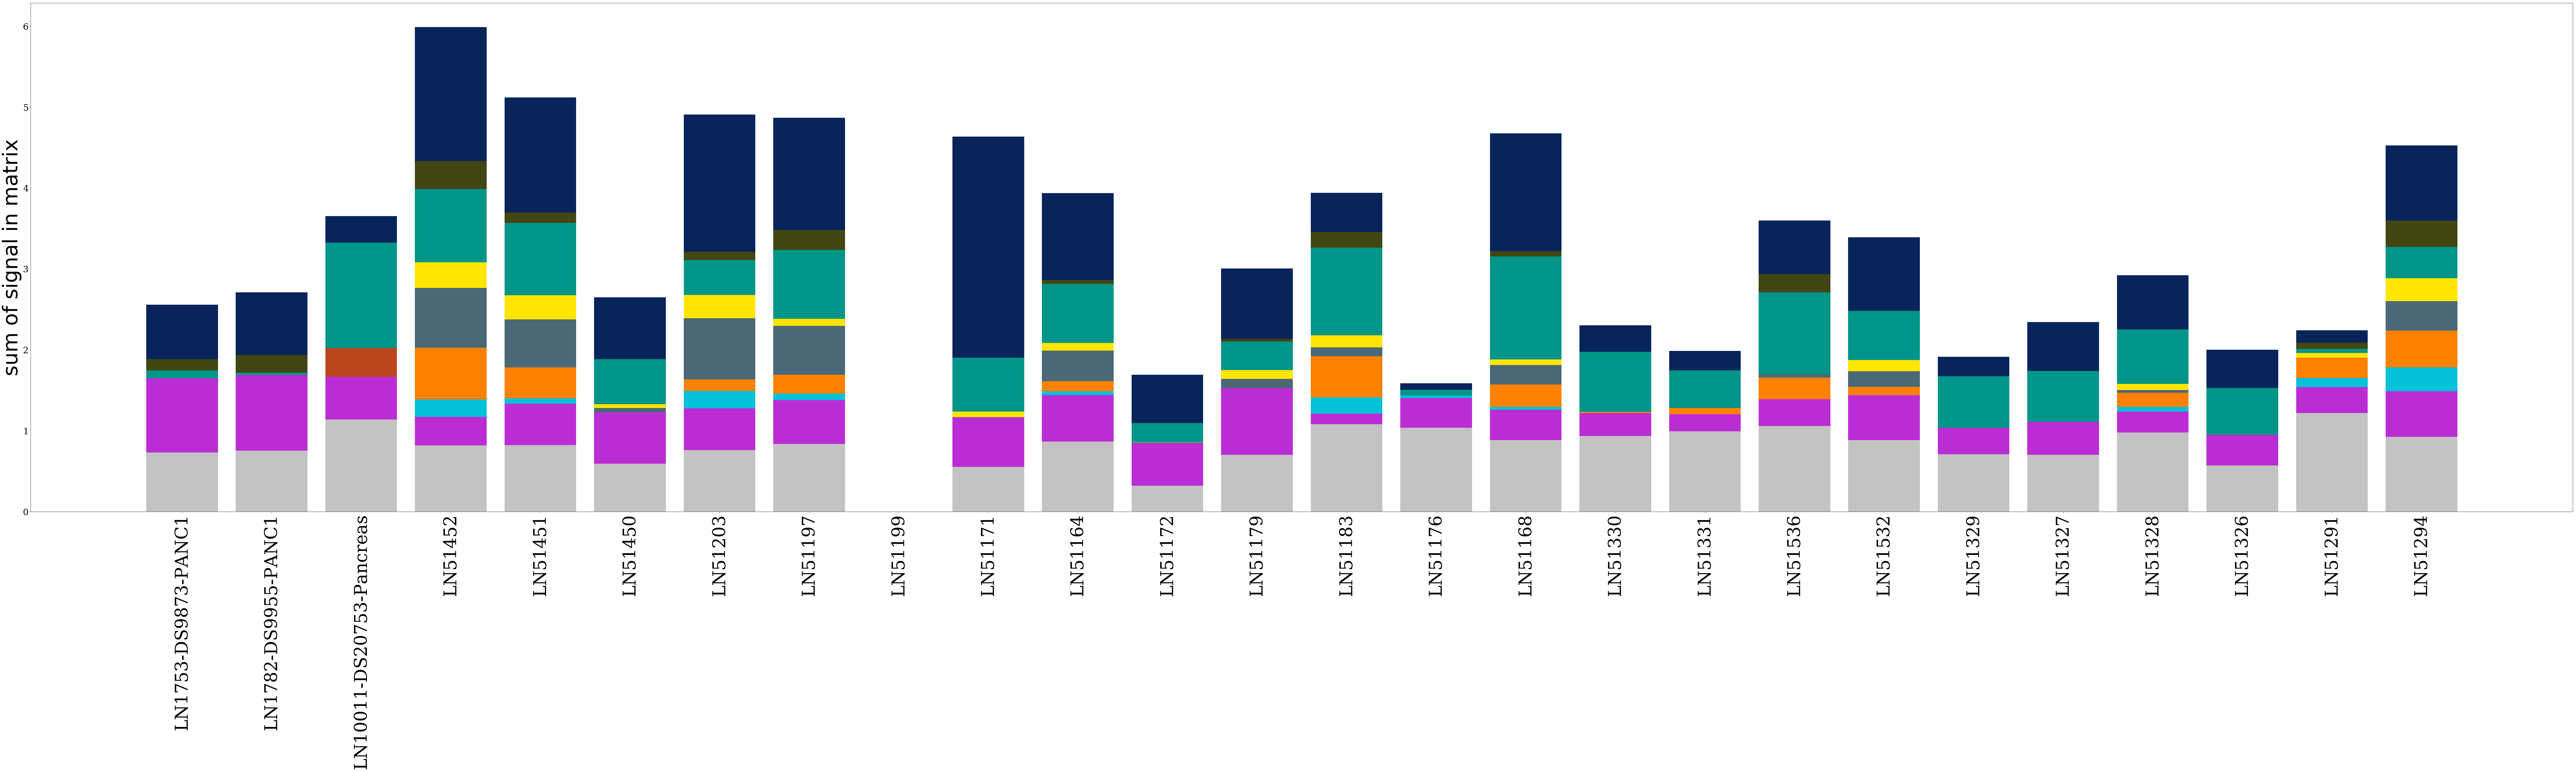

In [29]:
make_stacked_bar_plot(16, 26, old_new_panc.T, '', names=np.array(old_new_panc_names))

### new pancreatic samples generally have some similar composition to old ones. Some do have some novel components

# Now for the UMAP part

In [30]:
import umap

/Users/amuratov/anaconda/lib/python3.5/site-packages/numba/errors.py:102: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


### create a umap objects. Parameters are chosen to give it the sort of "interconnected" look

In [32]:
reducer = umap.UMAP(min_dist=0.5, n_neighbors=50, random_state=33)


### embed the original 733 sampl NMF matrix to 2 UMAP coordinates

In [33]:
embedding = reducer.fit_transform(Basis_orig)

### for the plot, color each point by the dominant NMF component

In [34]:
majcomp = np.argmax(Basis_orig, axis=1)

<Figure size 432x288 with 0 Axes>

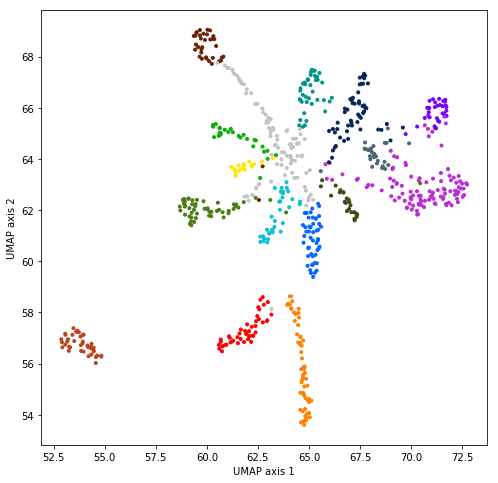

In [35]:
plt.clf()
plt.figure(figsize=(8,8))
plt.scatter(embedding[:,0], embedding[:,1], color=Comp_colors[majcomp], alpha=1, marker='.')
plt.ylabel('UMAP axis 2')
plt.xlabel('UMAP axis 1')
plt.show()

### now you can transform the new data into the same space

In [36]:
newdata = reducer.transform(Basis_panky)

In [38]:
majcomp_new = np.argmax(Basis_panky, axis=1)

### plot new data as stars, while original 733 are dots

<Figure size 432x288 with 0 Axes>

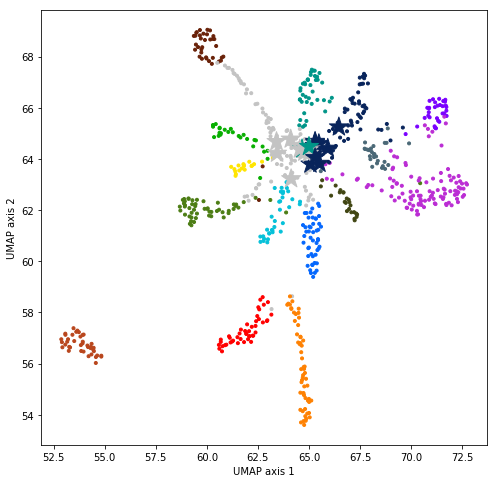

In [49]:
plt.clf()
plt.figure(figsize=(8,8))
plt.scatter(embedding[:,0], embedding[:,1], color=Comp_colors[majcomp], alpha=1, marker='.')
plt.scatter(newdata[:,0], newdata[:,1], color=Comp_colors[majcomp_new], alpha=1, marker='*', s=400)

plt.ylabel('UMAP axis 2')
plt.xlabel('UMAP axis 1')
plt.show()

### this version has upside down triangles to represent the old pancreas data

<Figure size 432x288 with 0 Axes>

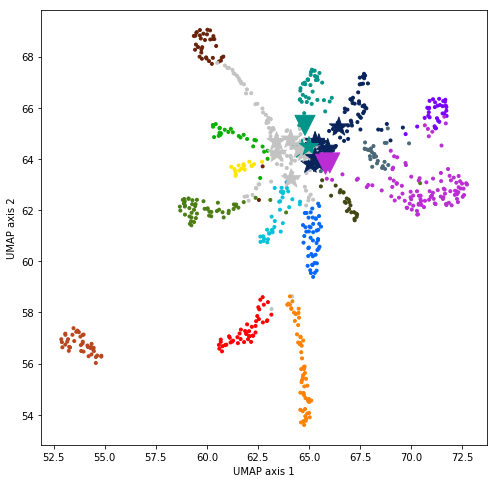

In [40]:
plt.clf()
plt.figure(figsize=(8,8))
plt.scatter(embedding[:,0], embedding[:,1], color=Comp_colors[majcomp], alpha=1, marker='.')
plt.scatter(newdata[:,0], newdata[:,1], color=Comp_colors[majcomp_new], alpha=1, marker='*', s=400)
plt.scatter(embedding[:,0][pancnames_cut], embedding[:,1][pancnames_cut], color=Comp_colors[majcomp[pancnames_cut]], alpha=1, marker='v', s=400)

plt.ylabel('UMAP axis 2')
plt.xlabel('UMAP axis 1')
plt.show()

### and finally, maybe to make things more visually 

<Figure size 432x288 with 0 Axes>

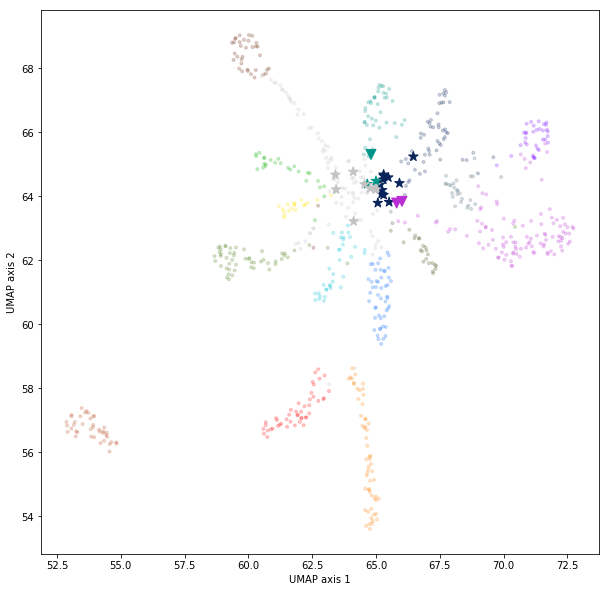

In [50]:
plt.clf()
plt.figure(figsize=(10,10))
plt.scatter(embedding[:,0], embedding[:,1], color=Comp_colors[majcomp], alpha=0.2, marker='.')
plt.scatter(newdata[:,0], newdata[:,1], color=Comp_colors[majcomp_new], alpha=1, marker='*', s=100)
plt.scatter(embedding[:,0][pancnames_cut], embedding[:,1][pancnames_cut], color=Comp_colors[majcomp[pancnames_cut]], alpha=1, marker='v', s=100)

plt.ylabel('UMAP axis 2')
plt.xlabel('UMAP axis 1')
plt.show()